In [1]:
import tensorflow as tf
import edward as ed

from edward.models import Normal, Bernoulli

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style('oceans16')

%matplotlib inline

C:\Users\ares\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [108]:
N1 = Normal(loc=3., scale=1.)
N2 = Normal(loc=4., scale=0.1)
y = tf.nn.sigmoid(N1 - N2)

In [109]:
N3 = Bernoulli(y)

In [79]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.InteractiveSession(config=config)

In [110]:
n1 = session.run(N1.sample(100))
n2 = session.run(N2.sample(100))
A = np.zeros((100))
for ind in range(100):
    A[ind] = session.run(y)
x = tf.placeholder(tf.float32)

In [111]:
Y = np.zeros((100))
for ind in range(100):
    Y[ind] = session.run(N3, feed_dict={x: A[ind]})

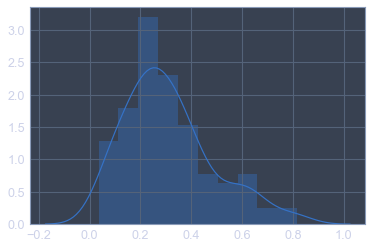

In [115]:
sns.distplot(A)